## Excercise 8.3
A simulation of a soccer or hockey game is built below. The input is the average number of goals scored per game, `lam`, and a simulation runs `n` times to create a sample. The mean error, RMSE, and 90% confidence intervals are reported to quantify the sampling error of this simulation.

No handles with labels found to put in legend.


Mean error -0.00406
RMSE 1.7335512683506076
90% confidence interval (0, 6)


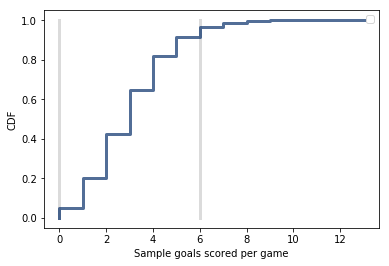

<Figure size 576x432 with 0 Axes>

In [40]:
import math
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

def numGoalsScored(lam):
    ''' Calculates the numebr of goals scored by sample an exp distrbution 
        assuming lam = goals per game
        
        lam: goals per game and > 0
        
        returns: int goals
    '''
    time = 0.0
    goals = 0
    while time <= 1:
        time += np.random.exponential(1/lam)
        if time < 1:
            goals += 1
    return goals

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def simulateGames(lam, n):
    ''' Simulates multiple games
    
    lam: goals per game and > 0
    n: number of games to simulate
    
    returns: int np.array
    '''
    means = []
    for _ in range(n):
        means.append(numGoalsScored(lam))
    
    return np.array(means)

def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

lam = 3 # average goals scored per soccer game
n = 100000 # num of times to run the simulation

means = simulateGames(lam, n)
print('Mean error', MeanError(means, lam))
print('RMSE', RMSE(means, lam))

cdf = thinkstats2.Cdf(means)
ci = cdf.Percentile(5), cdf.Percentile(95)

print('90% confidence interval', ci)

VertLine(ci[0])
VertLine(ci[1])
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Sample goals scored per game', ylabel = 'CDF')

The mean error and RMSE are very small, but the CI of $\pm 3$ is somewhat large with $\lambda = 3$. This is mostly related to $\lambda$ being small and the underlying distribution has a lower bound of 0. Let's take a look at a plot of the RMSE as we vary `lam`.

No handles with labels found to put in legend.


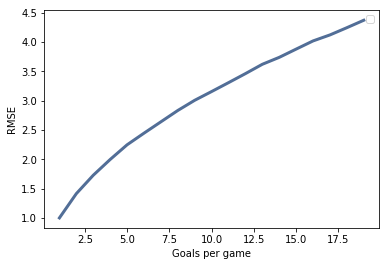

<Figure size 576x432 with 0 Axes>

In [44]:
rmse = {}
for l in range(1,20):
    rmse[l] = RMSE(simulateGames(l,n),l)
    
thinkplot.Plot(pd.Series(rmse))
thinkplot.Show(xlabel = "Goals per game", ylabel = 'RMSE')

If you increase the rate of goals scored per game, then the RMSE also increase. This is generally because as $\lambda$ increases for the underlying Poisson distribution then it starts to converge to a normal distribution, $N(\lambda, \sqrt\lambda)$, due to the central limit theorem (https://en.wikipedia.org/wiki/Central_limit_theorem). This means as $\lambda$ increases then the underlying sample variance increases, and thus a higher RMSE. You can see this by plotting the sampling distribution for $\lambda = 20$ as it starts to take the familiar sigmoid shape of a normal distribution CDF.

No handles with labels found to put in legend.


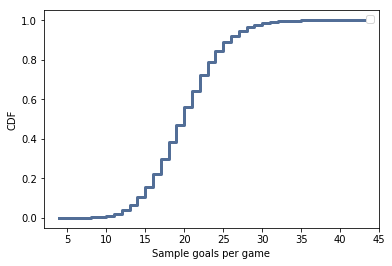

<Figure size 576x432 with 0 Axes>

In [45]:
lam = 20
means = simulateGames(lam, n)
cdf = thinkstats2.Cdf(means)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Sample goals per game', ylabel = 'CDF')

There is sampling bias we need to consider when running this type of experiment. The underlying assupmtion of the time between goals scored is exponentially distributed. This means the probability to score a goal in the game is indpendent of how long the game has been played or since the last goal scored due to the memoryless property of the exponential distribution. The games are played by athletes which inevitably become more tired as the game progresses, and thus more likely for a goal to be scored near the end of the game than the beginnning of the game. The exponential distribution is a good estimate for specific subsets of the game, and $\lambda$ most likely changes throughout the game. However, further research will be need to prove out this bias.